### Decision Trees


In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt

In [10]:
iris = load_iris()
X = iris.data[:,2:]
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
## visualize to a file
tree_clf.predict_proba([X[0]])
export_graphviz(
    tree_clf,
    out_file='./iris_tree.dot',
    feature_names=iris['feature_names'][2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [19]:
# printing a text representation
text_representation = tree.export_text(tree_clf)
print(text_representation)

|--- feature_0 <= 2.45
|   |--- class: 0
|--- feature_0 >  2.45
|   |--- feature_1 <= 1.75
|   |   |--- class: 1
|   |--- feature_1 >  1.75
|   |   |--- class: 2



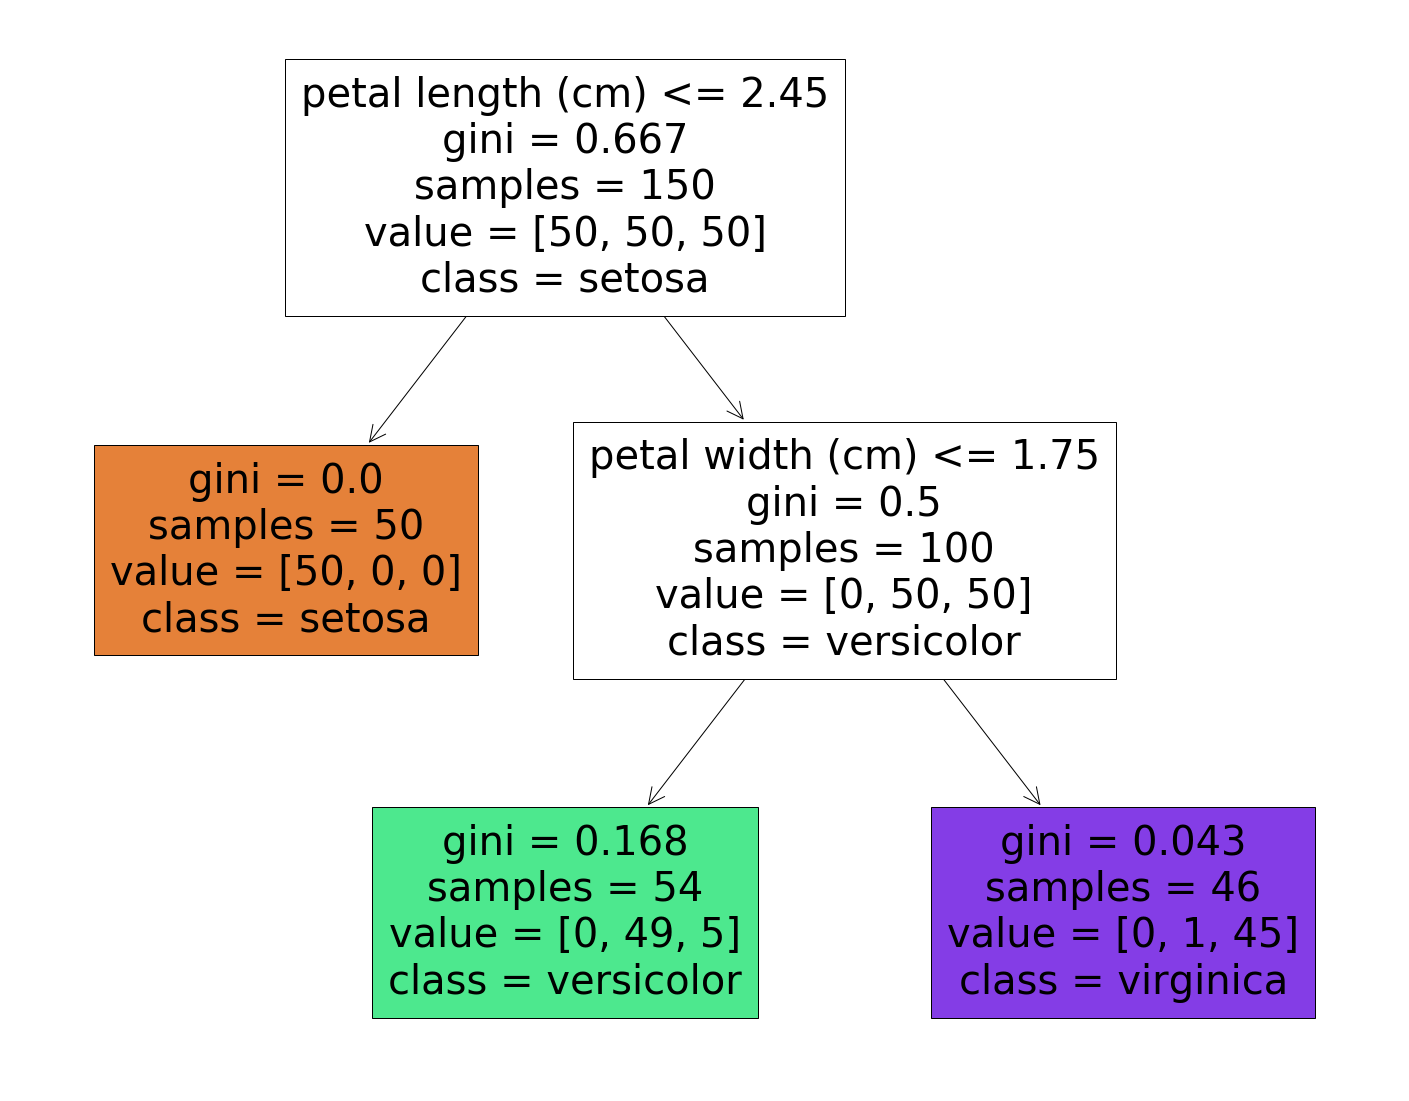

In [25]:
# with matplotlib
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf,
              feature_names=iris['feature_names'][2:],
              class_names=iris['target_names'],
                  filled=True)


gini purity
$G_{i} = 1 - \sum_{1}^{n}p_{i,j}^{2}$

Node1 :
$1 - \frac{50}{50}^{2} -\frac{0}{50}^{2} -\frac{0}{50}^{2}$ = 0

Probability At node (2):

$p(satosha) = \frac{total setosha on node}{total node samples}$ = $\frac{0}{54}$

$p(versicolor) = \frac{total versicolor on node}{total node samples}$ = $\frac{49}{54}$

$p(virginica) = \frac{total virginica on node}{total node samples}$ = $\frac{5}{54}$

## CART (Classification And Regression Tree)
It is the classification algorithm used by decision trees.

The algorithm first splits the training set into two using a single feature `k` and a threshold $t_{k}$. It then searches for the pair $(k,t_{k})$ that produces purest subset.

Cost function:

$$J(k, t_{k}) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$$

where $G_{left/right}:$ Measure of impurtiy in left/right subset

where $m_{left/right}:$ Number of instances in left/right subset

It will continue this process recursively on the subset until a fixed condition, e.g. maximum depth, unability to reduce impurity is reached.

It is a greedy algorithm, it searches and optimises at the top level.


### Purity Measures
1. Gini Impurity
2. Entropy: It is often used for purity measure. $H_{i} = - \sum_{k=1}^{n}P_{i,k} log_{2}(P_{i,k})$

### Regularization
Decision Trees make a very few assumptions, unlike linear regression/polynomial regression which assumes that the data is linear. Since there is no bias the overfitting is very convinient. 

These types of modes are called __non parametric__ because there are no parameter number set before the training has begun. Whereas in the linear models the degrees of freedom is limited.

Overfitting in such cases can be limited by:
1. Limiting the tree depth.
2. Deciding minimum number of samples that must exist on a node before it is split in the node is made.
3. minimm number of samples a leaf must have.
4. Max_feature number that are evaluated for splitting he node.

In [20]:
## Regression Trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_linnerud

data = load_linnerud()


In [13]:
X = data['data']
y = data['target'][:,1]
tree_reg = DecisionTreeRegressor(max_depth=3)

In [14]:
tree_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [15]:
tree_reg.predict(X[:10,:])

array([34.6       , 34.6       , 38.        , 34.6       , 34.6       ,
       36.33333333, 38.        , 34.6       , 32.75      , 32.75      ])

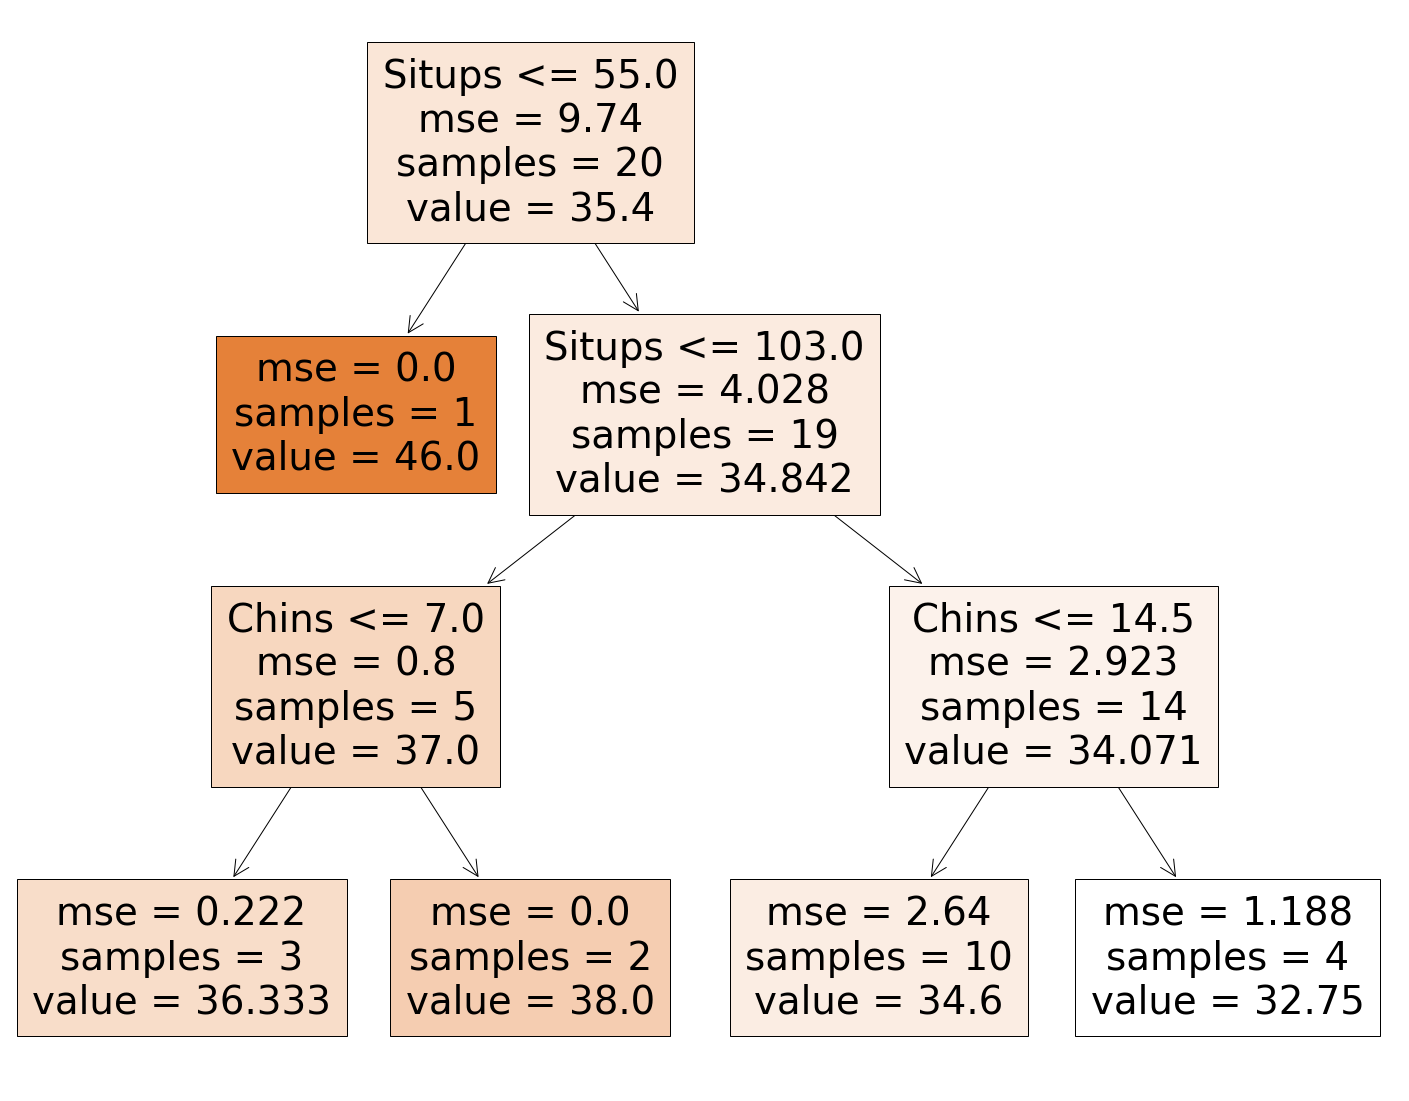

In [19]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_reg,
              feature_names=data['feature_names'],
              class_names=data['target_names'][1],
                  filled=True)

### Working of regression Tree
The nodes use the MSE values to predict values for each node. It splits the training set to minimse the MSE values.

The cost function it tries to minimize:
$$J(k,t_{k}) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$$

$MSE_{node} = \sum_{i\in node}(\hat{y}_{node}  - y^{(i)})^{2}$

$\hat{y}_{node} = \frac{1}{m_{node}} \sum_{i\in node}y^{(i)}$


### Instability
1. It favours orthogonal decision boundaries which makes it sensitive to training set rotation. i.e. if the same data is rotated along with the decision boundary, then the result will most likely change.
2. They do not generalize well.
One way to limit this is using PCA in the training set prior to fitting the data.
3. Very sensitive to the training data variation. 

Training comlexity:
$O(n*mlog(m)$

predictio: $O(log_{2}(m))$